In [77]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
sns.set_context('talk')

# About dataset

Step 1: Get data
About dataset: 
<a href='https://www.kaggle.com/c/neolen-house-price-prediction'> House Price Prediction </a>
In this notebook, we will eda some information about the factors influence on the house price

In [78]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [79]:
df = pd.read_csv('train.csv',index_col='Id')
df.sample(100)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
456,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,7,6,1973,1973,Hip,CompShg,HdBoard,HdBoard,BrkFace,320.0,TA,TA,CBlock,TA,TA,No,ALQ,916,Unf,0,326,1242,GasA,Fa,Y,SBrkr,1242,0,0,1242,0,0,1,1,3,1,TA,6,Typ,1,TA,Attchd,1973.0,Unf,2,528,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,9,2007,WD,Normal,175500
663,20,RL,120.0,13560,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,3,1968,1968,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,216.0,TA,TA,CBlock,Fa,Fa,No,Unf,0,Unf,0,1392,1392,GasA,Gd,Y,SBrkr,1392,0,0,1392,1,0,1,0,2,1,TA,5,Maj2,2,TA,Attchd,1968.0,RFn,2,576,TA,TA,Y,0,0,240,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,110000
370,20,RL,NaN,9830,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1959,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,72,Rec,258,733,1063,GasA,Ex,Y,SBrkr,1287,0,0,1287,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1997.0,Fin,2,576,TA,TA,Y,364,17,0,0,182,0,NaN,NaN,NaN,0,3,2010,WD,Normal,162000
813,20,C (all),66.0,8712,Grvl,NaN,Reg,Bnk,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,5,5,1952,1952,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,TA,CBlock,TA,TA,Av,Unf,0,Unf,0,540,540,GasA,TA,N,FuseA,1044,0,0,1044,0,0,1,0,2,1,Fa,4,Typ,0,NaN,Basment,1952.0,Unf,2,504,TA,TA,N,0,0,0,0,0,0,NaN,NaN,Shed,54,6,2010,WD,Alloca,55993
66,60,RL,76.0,9591,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,344.0,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,1143,1143,GasA,Ex,Y,SBrkr,1143,1330,0,2473,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2004.0,RFn,3,852,TA,TA,Y,192,151,0,0,0,0,NaN,NaN,NaN,0,10,2007,WD,Normal,317000
731,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1995,1996,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1180,Unf,0,415,1595,GasA,Ex,Y,SBrkr,1616,0,0,1616,1,0,2,0,2,1,Gd,5,Typ,1,TA,Attchd,1995.0,RFn,2,608,TA,TA,Y,237,152,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
1237,160,RL,36.0,2628,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,Twnhs,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,Wd Shng,Stone,106.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,764,764,GasA,Ex,Y,SBrkr,764,862,0,1626,0,0,2,1,2,1,Gd,6,Typ,0,NaN,BuiltIn,2003.0,RFn,2,474,TA,TA,Y,0,27,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,175500
907,20,RL,116.0,13501,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,208.0,Gd,TA,PConc,Gd,TA,No,GLQ,63,Unf,0,1560,1623,GasA,Ex,Y,SBrkr,1636,0,0,1636,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2006.0,RFn,3,865,TA,TA,Y,0,60,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,255000
680,20,RL,NaN,9945,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1961,1961,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,57.0,TA,TA,CBlock,TA,TA,No,Rec,827,Unf,0,161,988,GasA,TA,Y,SBrkr,988,0,0,988,1,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1963.0,Unf,2,572,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2007,WD,Normal,128500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [6]:
len(df.select_dtypes('number').columns)

37

In [7]:
len(df.select_dtypes('object').columns)

43

In [87]:
df.shape

(1460, 80)

The dataset has 1460 rows and 80 columns, size of dataset approximate 923.9 kb, It has 37 numeric feature and 43 categorical feature.

# Clean data

check missing value

In [11]:
tmp = df.isna().sum().reset_index(name='Isna')
tmp['percentage_nan'] = 100*tmp['Isna']/df.shape[0]
tmp = tmp.sort_values(['percentage_nan'])

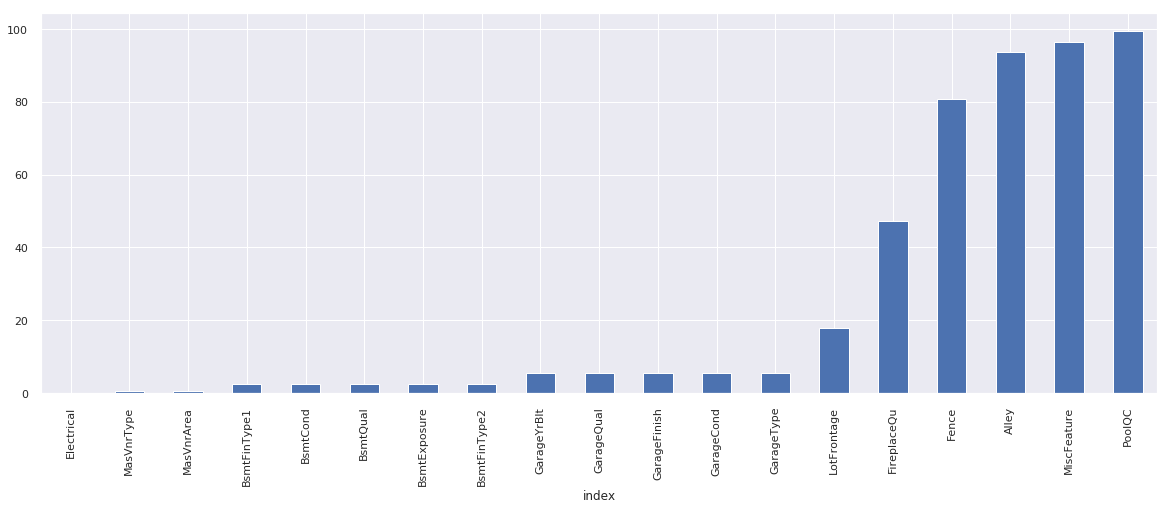

In [32]:
tmp[tmp['percentage_nan']>0].set_index(['index']).percentage_nan.plot(kind='bar',figsize=(20,7))

In [13]:
tmp[tmp['percentage_nan'] > 15]

,index,Isna,percentage_nan
2,LotFrontage,259,17.739726
56,FireplaceQu,690,47.260274
72,Fence,1179,80.753425
5,Alley,1369,93.767123
73,MiscFeature,1406,96.301370
71,PoolQC,1453,99.520548


In [14]:
drop_col = tmp.loc[tmp['percentage_nan'] > 15,'index'].values.tolist()
df = df.drop(columns = drop_col)
df.shape

(1460, 74)

6 Features have the amount of nan larger than 15 percent, we dont have many info from that feature so we delete them

check duplicates

In [15]:
df[df.duplicated(keep=False)]

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


No duplicated row in dataset

# Overview data

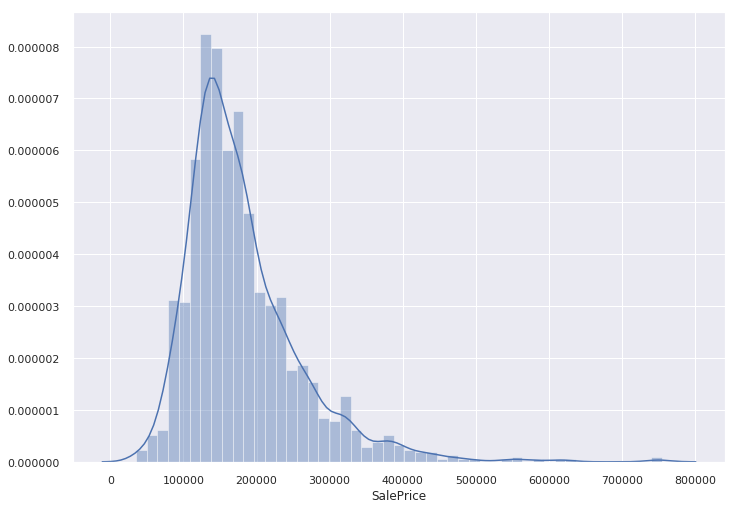

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.distplot(df['SalePrice'])

In [33]:
df.select_dtypes('number').describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Base on above table, we can clearly see that The SalePrice has average value is 180921.195890,
is around 1000k to 4000k, The highest price is 755000 and lowest price is 34900

In [37]:
quantitative = [f for f in df.columns if df.dtypes[f] != 'object']
len(quantitative)

36

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f06c8d12828>,
      dtype=object)

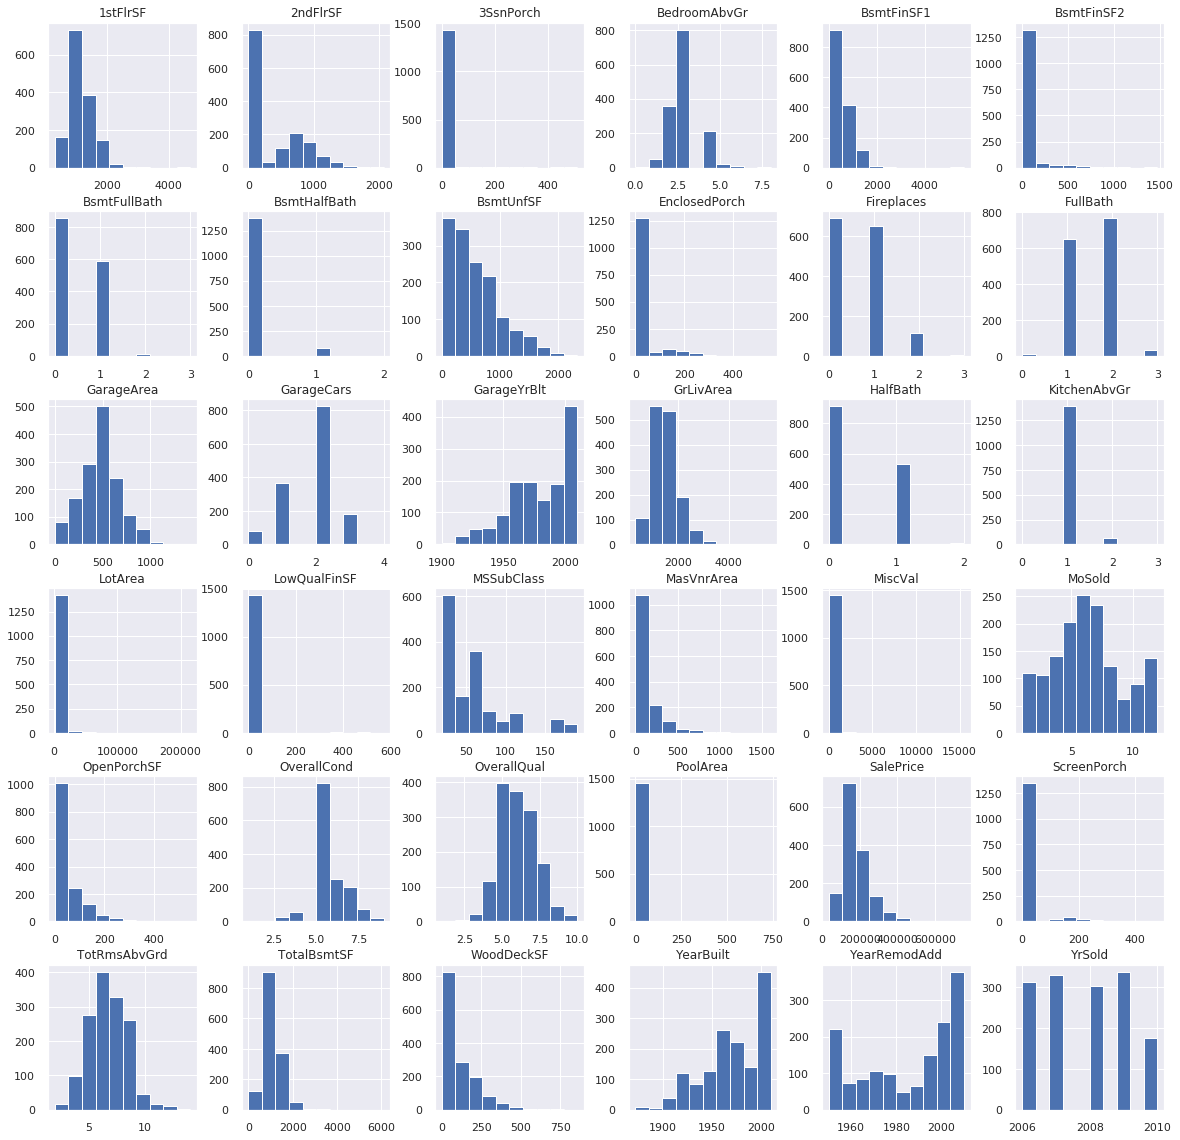

In [43]:
df[quantitative].hist(figsize=(20,20))

check constant feature

In [18]:
constant_feature = [feature for feature in df.columns.tolist() if df[feature].nunique() == 1]
len(constant_feature)

0

Constant feature is the feature which has only 1 unit value in dataset, we will remove them because is has no infomation, in this dataset there is no constant feature

Find top correlation feature

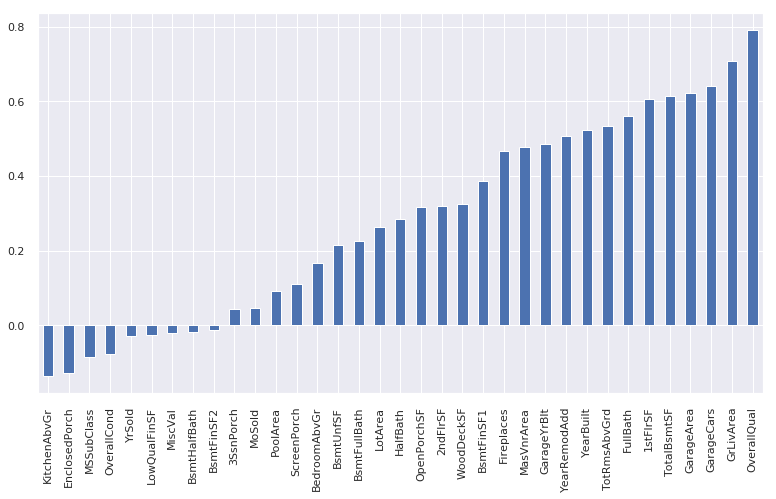

In [25]:
df.select_dtypes('number').corr()['SalePrice'].sort_values()[:-1].plot(kind='bar',figsize=(13,7))

eda top correlation feature

In [30]:
df.select_dtypes('number').corr()['SalePrice'].sort_values()[-5:]

GarageArea     0.623431
GarageCars     0.640409
GrLivArea      0.708624
OverallQual    0.790982
SalePrice      1.000000
Name: SalePrice, dtype: float64

In [80]:
top6_corr = df.select_dtypes('number').corr()['SalePrice'].sort_values()[-7:-1].index.tolist()
top6_corr

['1stFlrSF',
 'TotalBsmtSF',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'OverallQual']

Top correlation features with Sale price are: (GarageArea, Garagecar, OverallQual, TotalBsmtSF, 1stFlrSF  and GrLivArea). The Strong positive linear relationship; as X increases in value, Y increases in value also

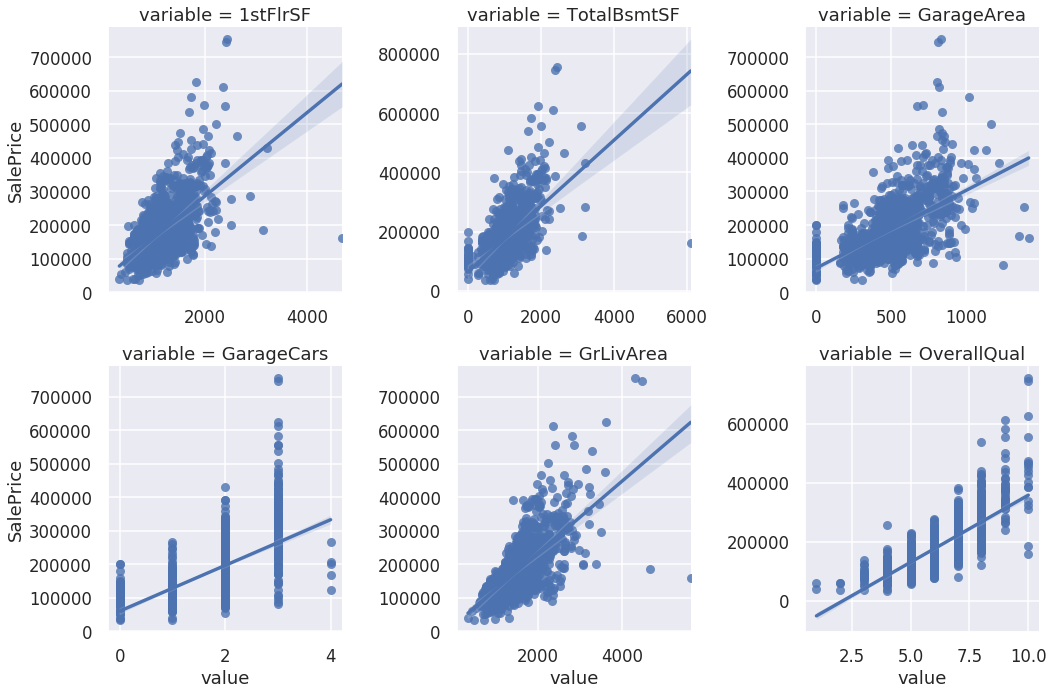

In [82]:
f = pd.melt(df[top6_corr+['SalePrice']], id_vars='SalePrice')
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(sns.regplot, "value", "SalePrice")

# categorical data

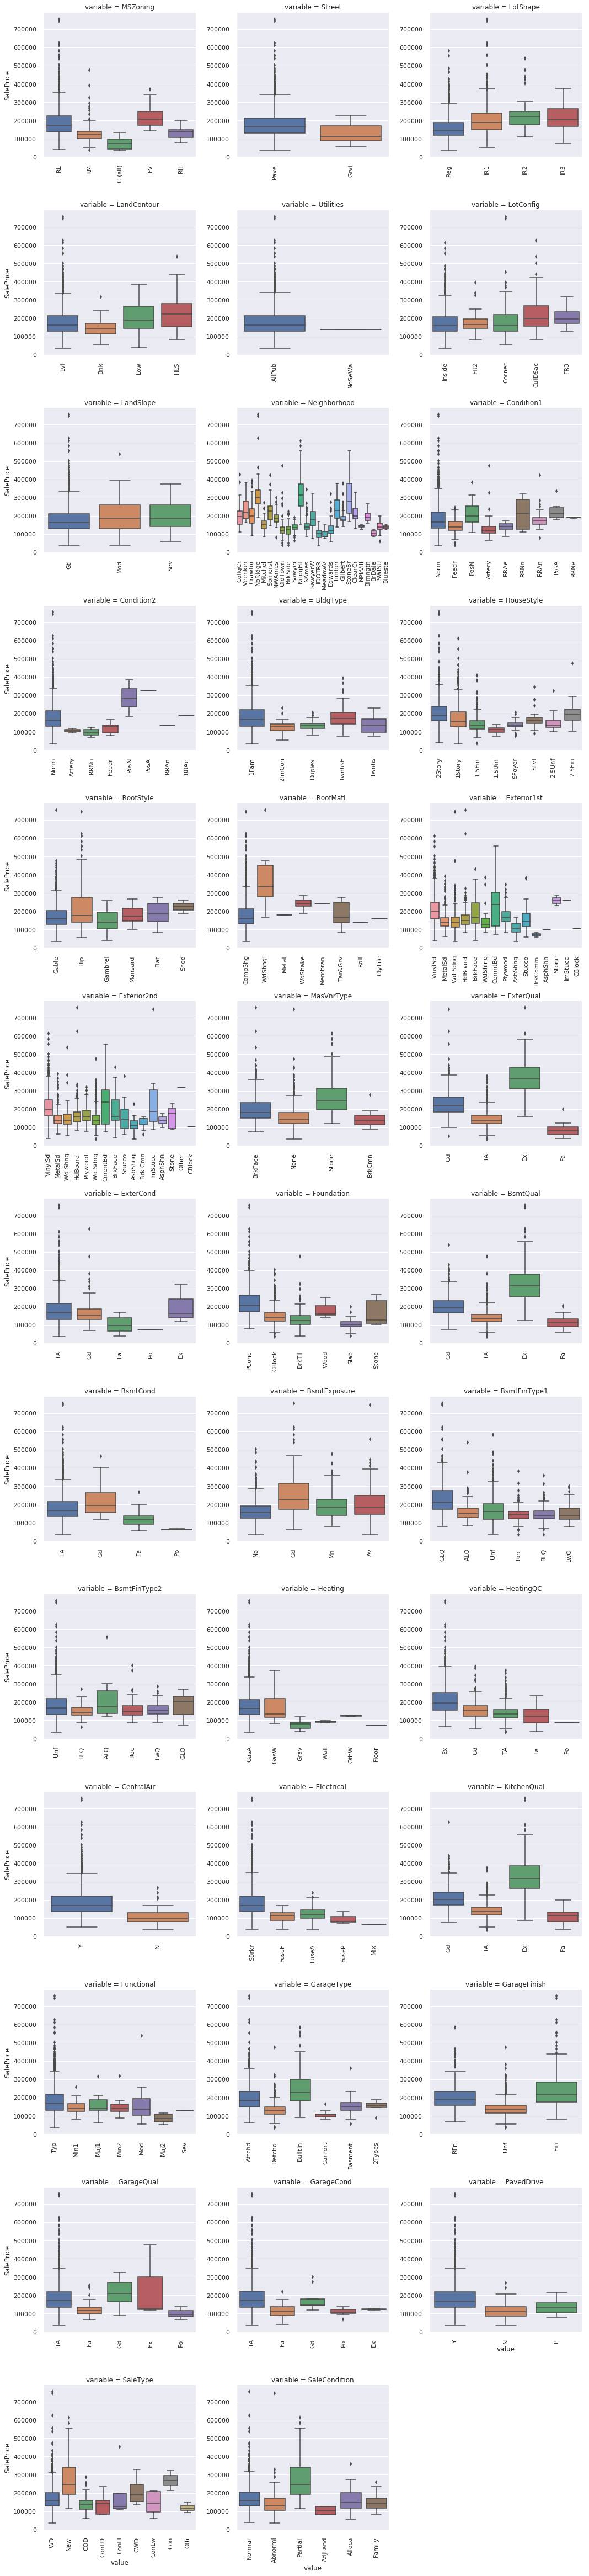

In [45]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
f = pd.melt(df, id_vars=['SalePrice'], value_vars=df.select_dtypes('object'))
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

There are also differences in variabilities between category values.

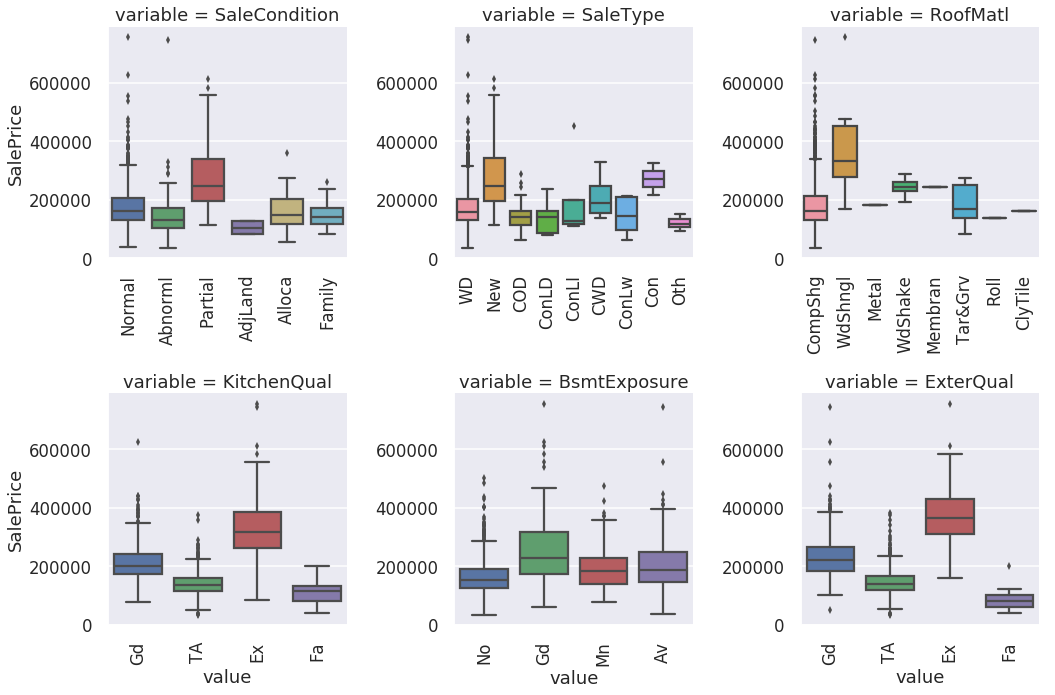

In [85]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
f = pd.melt(df, id_vars=['SalePrice'], value_vars=['SaleCondition','SaleType','RoofMatl',
                                                   'KitchenQual','BsmtExposure','ExterQual'
                                                  ])
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

the houses are New SaleType and has Partial SaleCondition, Ex KitchenQual, Ex BsmtQual is the most expensive house.